# INFO
Abbiamo 2 tabelle *stats_table* e *submission_stats_table* che contengono rispettivamente:
- i dati relativi alle visualizzazioni giornaliere di una challenge (stats_table)
- i dati relativi alle submissions giornaliere di una challenge (submission_stats_table)

### stats table
colonne:
- day_num: num. progressivo del giorno
- challenge_id: id della challenge
- total_views: totale delle views
- total_unique_views: totale delle views univoche

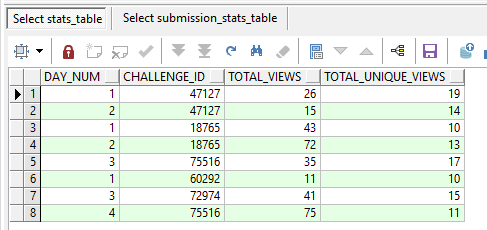

## submission stats table
colonne:
- day_num: num. progressivo del giorno
- challenge_id: id della challenge
- total_submissions: totale delle submissions
- total_accepted_submissions: totale delle submissions accettate

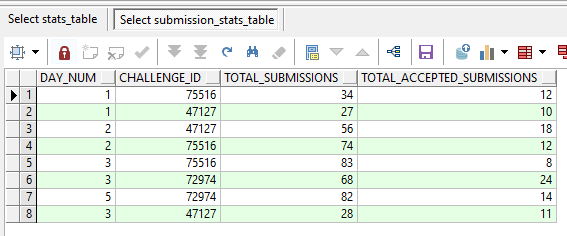

# DATI DI ESEMPIO
è possibile trovare lo script SQL per caricare su DB alcuni dati di esempio (come da immagini sopra)

Siccome uso MSS;S - SQLServer e non il dialetto di Oracle, ho convertito la query così:
    
```sql


DROP TABLE IF EXISTS stats_table;
DROP TABLE IF EXISTS submission_stats_table;


CREATE TABLE stats_table (
    day_num INT,
    challenge_id INT,
    total_views INT,
    total_unique_views INT
);


CREATE TABLE submission_stats_table (
    day_num INT,
    challenge_id INT,
    total_submissions INT,
    total_accepted_submissions INT
);



INSERT INTO stats_table   (day_num, challenge_id, total_views, total_unique_views)
VALUES 
	(1,47127, 26, 19),
	(2,47127, 15, 14),
	(1,18765, 43, 10),
	(2,18765, 72, 13),
	(3,75516, 35, 17),
	(1,60292, 11, 10),
	(3,72974, 41, 15),
	(4,75516, 75, 11);





INSERT INTO submission_stats_table  (day_num, challenge_id, total_submissions, total_accepted_submissions)
VALUES 
	(1, 75516, 34, 12),
	(1, 47127, 27, 10),
	(2, 47127, 56, 18),
	(2, 75516, 74, 12),
	(3, 75516, 83, 8),
	(3, 72974, 68, 24),
	(5, 72974, 82, 14),
	(3, 47127, 28, 11);



SELECT *
FROM stats_table;

SELECT *
FROM submission_stats_table;
```

# ESERCIZIO 1

Si richiede di scrivere una query SQL per estrarre, per ogni giorno e per ogni challenge, il num di views e di submissions

SQLite

In [ ]:

SELECT
    COALESCE(s.day_num, sub.day_num) AS day_num,
    COALESCE(s.challenge_id, sub.challenge_id) AS challenge_id,
    COALESCE(s.total_views, 0) AS total_views,
    COALESCE(s.total_unique_views, 0) AS totale_unique_views,
    COALESCE(sub.total_submissions,0) AS total_submissions,
    COALESCE(sub.total_accepted_submissions,0) AS total_accepted_submissions
FROM dbo.stats_table AS s
FULL OUTER JOIN dbo.submission_stats_table AS sub
    ON  s.day_num = sub.day_num
    AND s.challenge_id = sub.challenge_id
ORDER BY day_num, challenge_id;

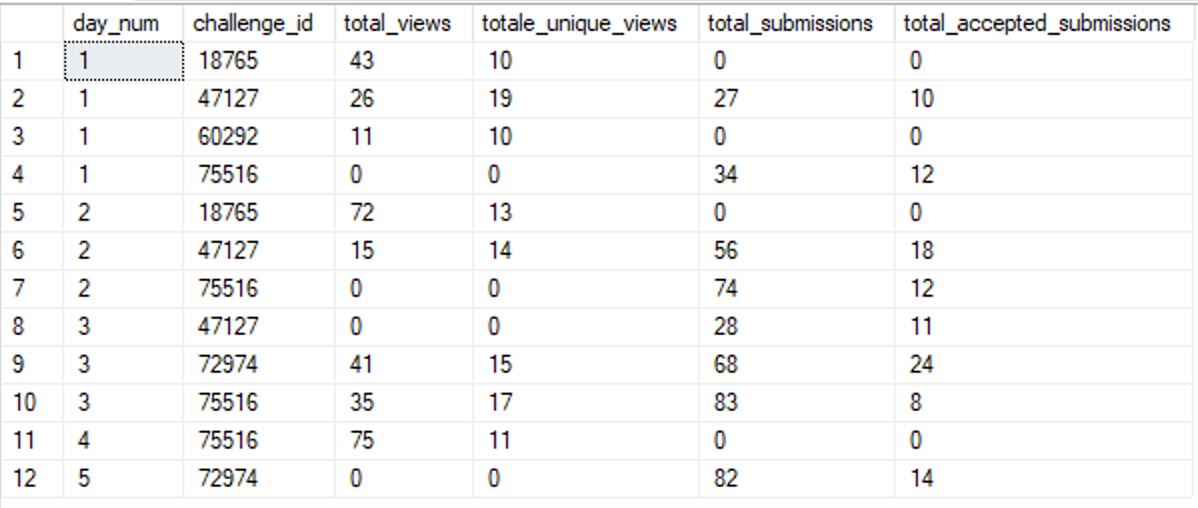

# ESERCIZIO 2

Si richiede di scrivere una query SQL per estrarre, per ogni giorno, le challenge che non hanno ricevuto submissions ma hanno ricevuto delle views

In [ ]:
SELECT
	s.day_num,
	s.challenge_id
FROM dbo.stats_table AS s
LEFT JOIN dbo.submission_stats_table AS sub
    ON  s.day_num = sub.day_num
    AND s.challenge_id = sub.challenge_id
WHERE sub.total_submissions IS NULL -- AND s.total_views > 0
ORDER BY s.day_num

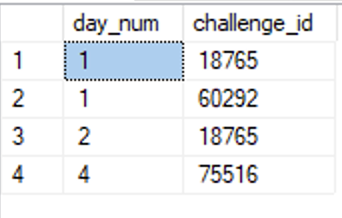